In [1]:
from os.path import getsize

import pandas as pd

from matplotlib import pyplot as plt

from episode_functions import *

In [2]:
filename = '/media/kneff/502A1B3F2A1B2210/Linux_ONLY/Conda_envs/student_download/gd1_data.hdf'
candidate_df = pd.read_hdf("/media/kneff/502A1B3F2A1B2210/Linux_ONLY/Conda_envs/student_download/gd1_data.hdf", 'candidate_df')

Text(0.5, 0, 'Color (g-i)')

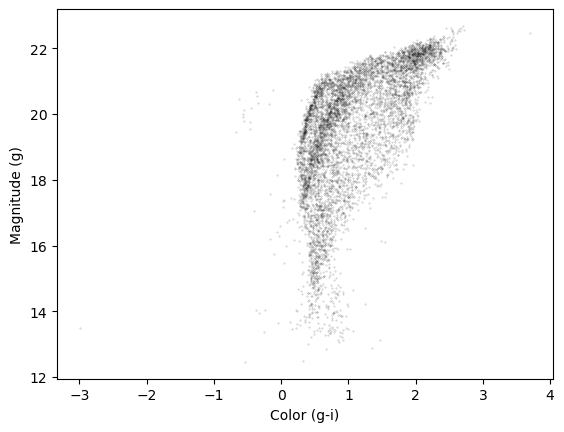

In [3]:
x = candidate_df['g_mean_psf_mag'] - candidate_df['i_mean_psf_mag']
y = candidate_df['g_mean_psf_mag']
plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.ylabel('Magnitude (g)')
plt.xlabel('Color (g-i)')

(22.0, 14.0)

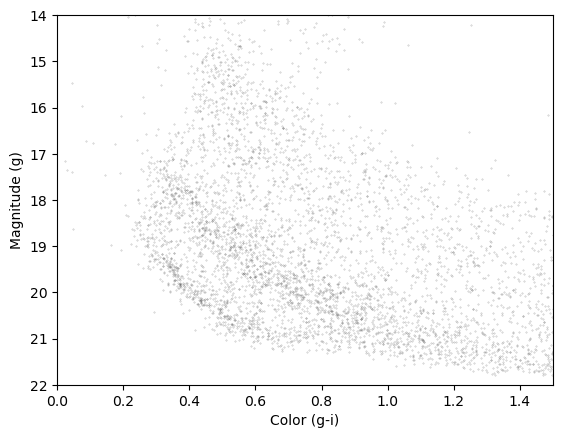

In [4]:
x = candidate_df['g_mean_psf_mag'] - candidate_df['i_mean_psf_mag']
y = candidate_df['g_mean_psf_mag']
plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.ylabel('Magnitude (g)')
plt.xlabel('Color (g-i)')

plt.xlim([0,1.5])
plt.ylim([22,14])

In [5]:
def plot_cmd(dataframe):
    y=dataframe["g_mean_psf_mag"]
    x=dataframe["g_mean_psf_mag"]-dataframe["i_mean_psf_mag"]
    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.ylabel('Magnitude (g)')
    plt.xlabel('Color (g-i)')

    plt.xlim([0,1.5])
    plt.ylim([22,14])

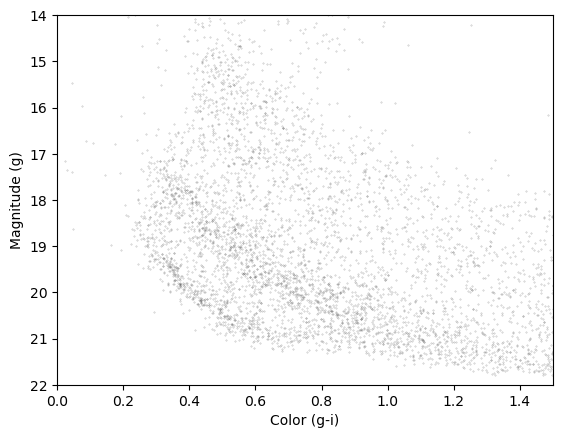

In [6]:
plot_cmd(candidate_df)

In [7]:
filename = 'gd1_isochrone.hdf5'
iso_df = pd.read_hdf(filename, 'iso_df')
iso_df.head()

,mag_g,color_g_i
0,28.294743,2.195021
1,28.189718,2.166076
2,28.051761,2.129312
3,27.916194,2.093721
4,27.780024,2.058585


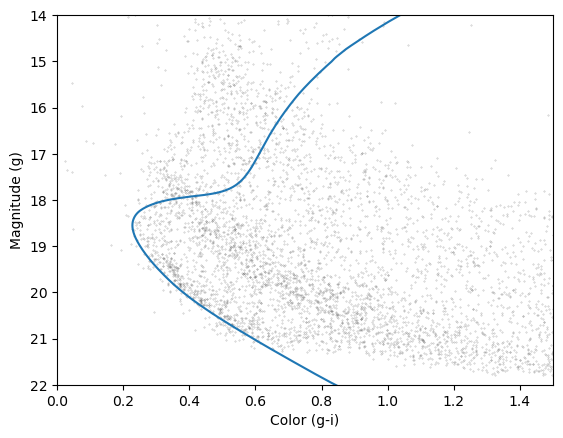

In [8]:
plot_cmd(candidate_df)
plt.plot(iso_df["color_g_i"],iso_df["mag_g"])

In [9]:
g_all = iso_df["mag_g"]
g_mask=(g_all>18.0) & (g_all<21.5)
g_mask.sum()


117

In [10]:
iso_masked=iso_df[g_mask]
iso_masked.head()

,mag_g,color_g_i
94,21.411746,0.692171
95,21.322466,0.670238
96,21.233380,0.648449
97,21.144427,0.626924
98,21.054549,0.605461


In [11]:
g=iso_masked["mag_g"]
left_color=iso_masked["color_g_i"] - 0.06
right_color=iso_masked["color_g_i"] + 0.12

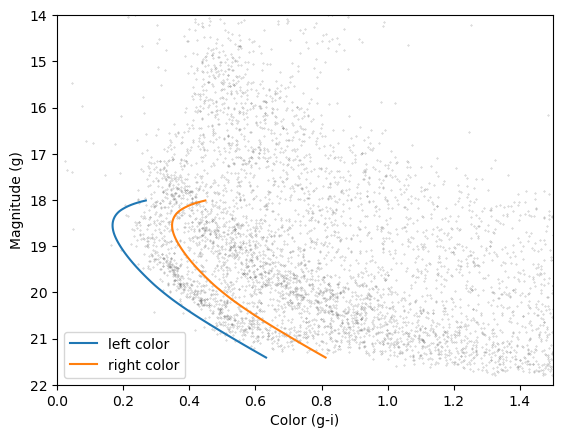

In [12]:
plot_cmd(candidate_df)

plt.plot(left_color, g, label='left color')
plt.plot(right_color, g, label='right color')
plt.legend()

In [13]:
reverse_right_color=right_color[::-1]

In [14]:
import numpy as np
color_loop=np.append(left_color,reverse_right_color)
color_loop.shape

(234,)

In [15]:
mag_loop=np.append(g,g[::-1])
mag_loop.shape

(234,)

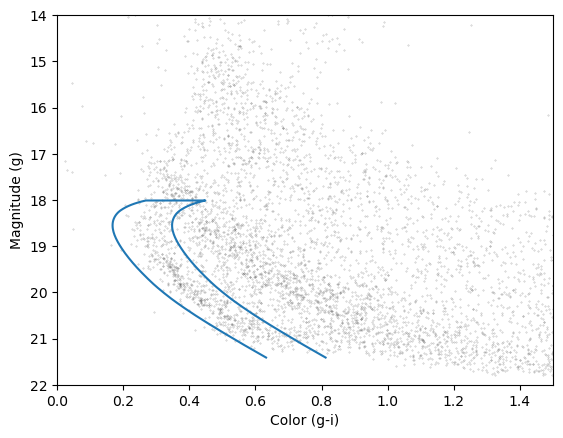

In [16]:
plot_cmd(candidate_df)
plt.plot(color_loop,mag_loop)

In [17]:
loop_df=pd.DataFrame()
loop_df["color_loop"]=color_loop
loop_df["mag_loop"]=mag_loop
loop_df.head()

,color_loop,mag_loop
0,0.632171,21.411746
1,0.610238,21.322466
2,0.588449,21.233380
3,0.566924,21.144427
4,0.545461,21.054549


In [18]:
from matplotlib.patches import Polygon

polygon = Polygon(loop_df)
polygon


In [19]:
polygon.contains_points([(0.632171,21.411746),(1,17)])

array([ True, False])

In [20]:
filename = 'gd1_data.hdf'
loop_df.to_hdf(filename, 'loop_df')

/tmp/ipykernel_3996/4218245210.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  loop_df.to_hdf(filename, 'loop_df')


In [21]:
cmd_df = pd.DataFrame()
cmd_df['color']=candidate_df['g_mean_psf_mag']-candidate_df['i_mean_psf_mag']
cmd_df['mag']=candidate_df['g_mean_psf_mag']
cmd_df.head()

,color,mag
0,0.3804,17.8978
1,1.6092,19.2873
2,0.4457,16.9238
3,1.5902,19.9242
4,1.4853,16.1516


In [22]:
inside_mask=polygon.contains_points(cmd_df)
inside_mask
inside_mask.sum()

640

In [23]:
winner_df=candidate_df[inside_mask]


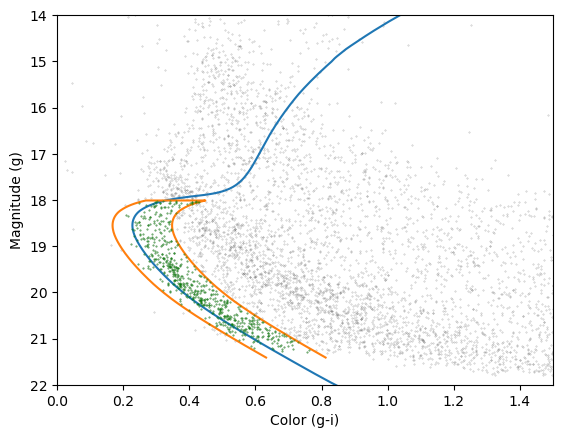

In [24]:

plot_cmd(candidate_df)
plt.plot(iso_df['color_g_i'],iso_df['mag_g'])
plt.plot(color_loop,mag_loop)
x=winner_df['g_mean_psf_mag']-winner_df['i_mean_psf_mag']
y=winner_df['g_mean_psf_mag']
plt.plot(x,y,'go',markersize=0.5,alpha=0.5)
plt.savefig('color_mag_plot.png',dpi=300)

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3996/1948650257.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi_1$ [deg]')
/tmp/ipykernel_3996/1948650257.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi_2$ [deg]')


(-72.39942770371307,
 -17.622834676678718,
 -5.934485309630675,
 5.915026213827369)

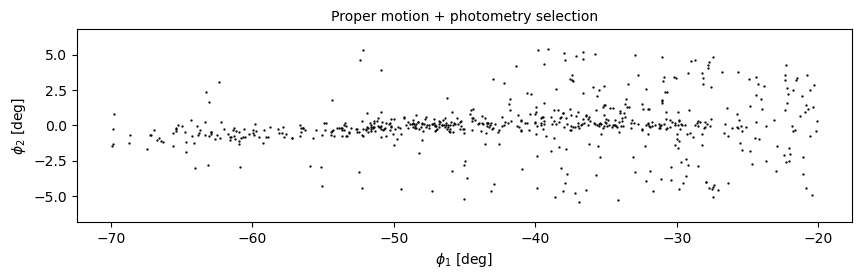

In [25]:
fig = plt.figure(figsize=(10,2.5))

x = winner_df['phi1']
y = winner_df['phi2']
plt.plot(x, y, 'ko', markersize=0.7, alpha=0.9)

plt.xlabel('$\phi_1$ [deg]')
plt.ylabel('$\phi_2$ [deg]')
plt.title('Proper motion + photometry selection', fontsize='medium')

plt.axis('equal')

In [26]:
def plot_cmd_selection(df):
    x = df['phi1']
    y = df['phi2']

    plt.plot(x, y, 'ko', markersize=0.7, alpha=0.9)

    plt.xlabel('$\phi_1$ [deg]')
    plt.ylabel('$\phi_2$ [deg]')
    plt.title('Proper motion + photometry selection', fontsize='medium')

    plt.axis('equal')

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3996/3368492103.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi_1$ [deg]')
/tmp/ipykernel_3996/3368492103.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi_2$ [deg]')


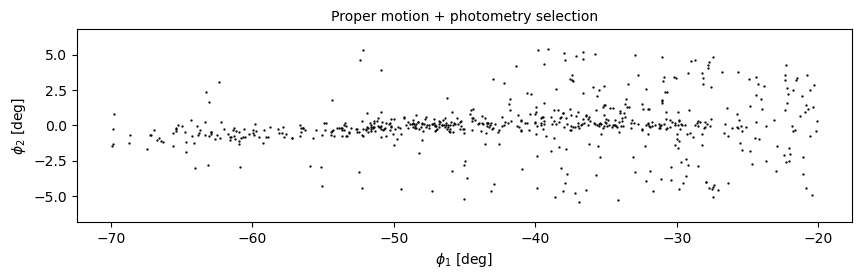

In [27]:
fig=plt.figure(figsize=(10,2.5))
plot_cmd_selection(winner_df)

In [28]:
filename = 'gd1_data.hdf'
winner_df.to_hdf(filename, 'winner_df')

/tmp/ipykernel_3996/1670003930.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  winner_df.to_hdf(filename, 'winner_df')


In [29]:
filename = 'gd1_data.hdf'
winner_df = pd.read_hdf(filename, 'winner_df')

centerline_df = pd.read_hdf(filename, 'centerline_df')
candidate_df = pd.read_hdf(filename, 'candidate_df')
loop_df = pd.read_hdf(filename, 'loop_df')

In [30]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

pm1_rect, pm2_rect = make_rectangle(
    pm1_min, pm1_max, pm2_min, pm2_max)

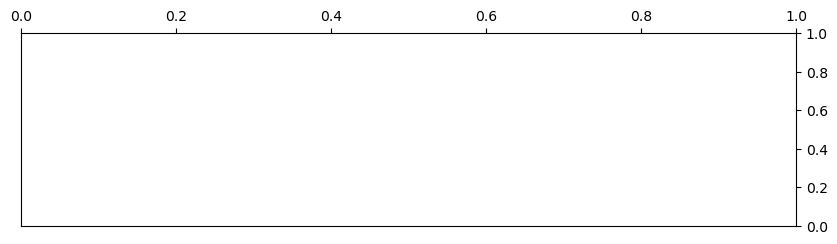

In [31]:
fig=plt.figure(figsize=(10,2.5))
ax=fig.add_subplot(1,1,1)
ax.tick_params(reset=True,top=True,labeltop=True,right=True,labelright=True,labelleft=False,left=False,bottom=False,labelbottom=False)


In [32]:
import matplotlib as mpl
mpl.matplotlib_fname()

'/home/kneff/miniconda3/envs/AstronomicalData/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc'

In [33]:
plt.style.available
plt.style.use('default')

Text(-50, 2.5, ':0 (idk)')

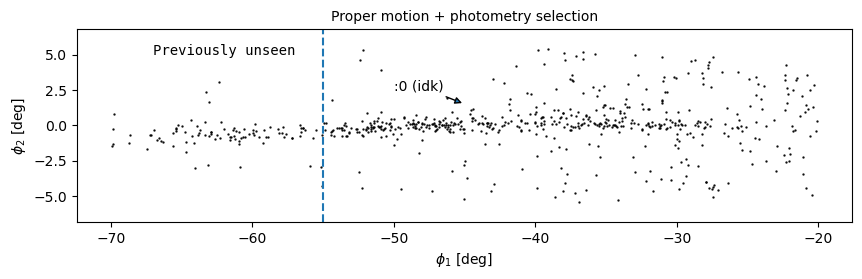

In [34]:
fig=plt.figure(figsize=(10,2.5))
plot_cmd_selection(winner_df)
plt.axvline(-55,linestyle='--')
plt.text(-67,5,'Previously unseen',fontfamily='monospace')
plt.annotate(':0 (idk)',xy=(-45,1.5),xytext=(-50,2.5),arrowprops={'arrowstyle':'-|>'})

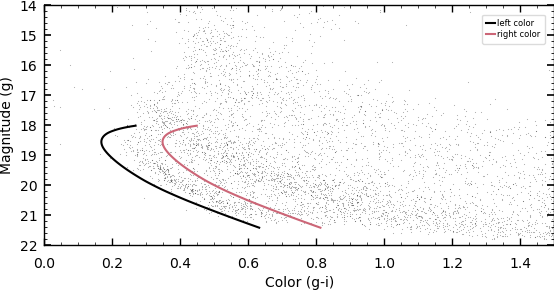

In [35]:
plt.style.use('./az-paper-twocol.mplstyle')

plot_cmd(candidate_df)

plt.plot(left_color, g, label='left color')
plt.plot(right_color, g, label='right color')

plt.legend()

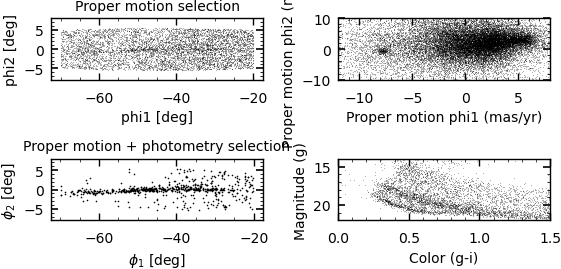

In [36]:
fig=plt.figure()
shape=(2,2)
ax1=plt.subplot2grid(shape,(0,0))
plot_pm_selection(candidate_df)
ax2=plt.subplot2grid(shape, (0, 1))
plot_proper_motion(centerline_df)
ax3 = plt.subplot2grid(shape, (1, 0))
plot_cmd_selection(winner_df)
ax4 = plt.subplot2grid(shape, (1, 1))
plot_cmd(candidate_df)
plt.tight_layout()

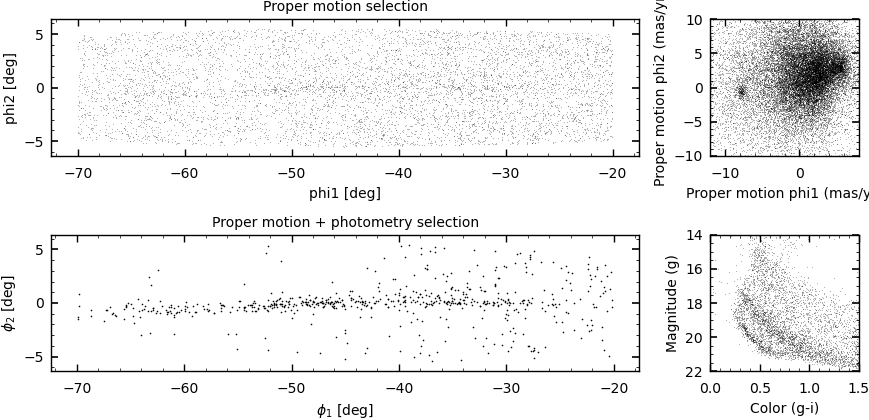

In [37]:
plt.figure(figsize=(9,4.5))
shape=(2,4)
ax1=plt.subplot2grid(shape,(0,0),colspan=3)
plot_pm_selection(candidate_df)
ax2=plt.subplot2grid(shape, (0, 3))
plot_proper_motion(centerline_df)
ax3 = plt.subplot2grid(shape, (1, 0),colspan=3)
plot_cmd_selection(winner_df)
ax4 = plt.subplot2grid(shape, (1, 3))
plot_cmd(candidate_df)
plt.tight_layout()

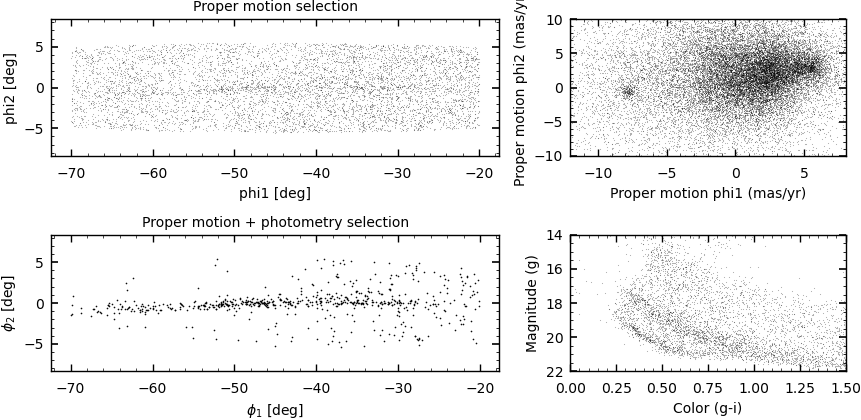

In [40]:
plt.figure(figsize=(9,4.5))
shape=(2,5)
ax1=plt.subplot2grid(shape,(0,0),colspan=3)
plot_pm_selection(candidate_df)
ax2=plt.subplot2grid(shape, (0, 3),colspan=2)
plot_proper_motion(centerline_df)
ax3 = plt.subplot2grid(shape, (1, 0),colspan=3)
plot_cmd_selection(winner_df)
ax4 = plt.subplot2grid(shape, (1, 3),colspan=2)
plot_cmd(candidate_df)
plt.tight_layout()